In [1]:
%matplotlib inline

In [2]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
# from preprocessing import crop
# from preprocessing import resize
# from preprocessing import resize_crop
from preprocessing import inception

from preprocessing.tf_models import vgg as tf_vgg
from preprocessing.tf_models import inception as tf_inception

# from preprocessing.imagenet import crop as in_crop
# from preprocessing.imagenet import resize as in_resize
from preprocessing.imagenet import resize_crop as in_resize_crop

from preprocessing.imagenet.bgr import crop as in_bgr_crop
from preprocessing.imagenet.bgr import resize as in_bgr_resize
# from preprocessing.imagenet.bgr import resize_crop as in_bgr_resize_crop

In [3]:
img_size      = 224
img_path      = './images/llama.jpeg'
img_file      = tf.read_file(img_path)
img_decoded   = tf.image.decode_jpeg(img_file, channels=3)

# Basics
# img_crop        = crop.preprocess_image(img_decoded, img_size, img_size)
# img_resize      = resize.preprocess_image(img_decoded, img_size, img_size)
# img_resize_crop = resize_crop.preprocess_image(img_decoded, img_size, img_size)

# With ImageNet mean subtraction
# img_in_crop        = in_crop.preprocess_image(img_decoded, img_size, img_size)
# img_in_resize      = in_resize.preprocess_image(img_decoded, img_size, img_size)
img_in_resize_crop = in_resize_crop.preprocess_image(img_decoded, img_size, img_size)

# With ImageNet mean subtraction and changing the color dimensions to BGR
img_in_bgr_crop        = in_bgr_crop.preprocess_image(img_decoded, img_size, img_size)
img_in_bgr_resize      = in_bgr_resize.preprocess_image(img_decoded, img_size, img_size)
# img_in_bgr_resize_crop = in_bgr_resize_crop.preprocess_image(img_decoded, img_size, img_size)

# Tensorflow Scripts for VGG and Inception
img_tf_vgg       = tf_vgg.preprocess_image(img_decoded, img_size, img_size)
img_tf_inception = tf_inception.preprocess_image(img_decoded, img_size, img_size)

# My Script for inception
img_inception = inception.preprocess_image(img_decoded, img_size, img_size)

In [38]:
with tf.Session() as sess:
    img = sess.run(img_decoded)
    
    # c = sess.run(img_crop)
    # r = sess.run(img_resize)
    # rc = sess.run(img_resize_crop)
    
    # in_c = sess.run(img_in_crop)
    # in_r = sess.run(img_in_resize)
    in_rc = sess.run(img_in_resize_crop)
    
    in_bgr_c = sess.run(img_in_bgr_crop)
    in_bgr_r = sess.run(img_in_bgr_resize)
    # in_bgr_rc = sess.run(img_in_bgr_resize_crop)
    
    tf_v = sess.run(img_tf_vgg)
    tf_i = sess.run(img_tf_inception)
    
    i = sess.run(img_inception)
    for x in range(len(i)):
        i[x] = i[x] * 255
        tf_i[x] = tf_i[x] * 255

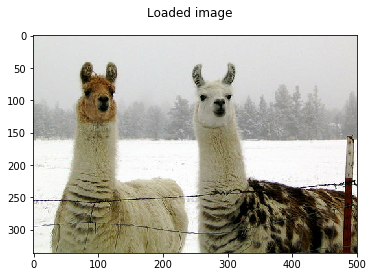

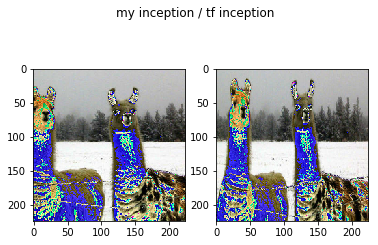

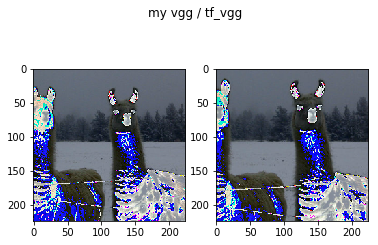

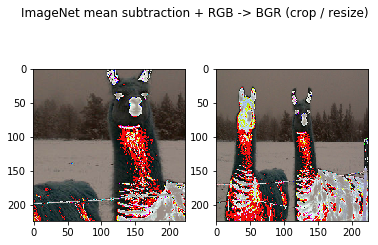

In [39]:
    plt.figure()
    plt.imshow(img.astype(np.uint8))
    plt.suptitle("Loaded image")
    plt.show()
    
    plt.figure()
    plt.suptitle("my inception / tf inception")
    plt.subplot(121)
    plt.imshow(i.astype(np.uint8))
    plt.subplot(122)
    plt.imshow(tf_i.astype(np.uint8))
    plt.show()
    
    plt.figure()
    plt.suptitle("my vgg / tf_vgg")
    plt.subplot(121)
    plt.imshow(in_rc.astype(np.uint8))
    plt.subplot(122)
    plt.imshow(tf_v.astype(np.uint8))
    plt.show()
    
    plt.figure()
    plt.suptitle("ImageNet mean subtraction + RGB -> BGR (crop / resize)")
    plt.subplot(121)
    plt.imshow(in_bgr_c.astype(np.uint8))
    plt.subplot(122)
    plt.imshow(in_bgr_r.astype(np.uint8))
    plt.show() 